<a href="https://colab.research.google.com/github/ajitpadole/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import missingno as msno
import plotly.express as px


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/ Netflix-Movies-and-TV-Shows-Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df.shape

(7787, 12)

In [11]:
df.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [12]:
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

The dataset has 7787 rows and 12 columns 

In [13]:
from pandas.core import missing
# calulating perscentage of null values in the columns
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
director,2389,0.306793
cast,718,0.092205
country,507,0.065109
date_added,10,0.001284
rating,7,0.000899
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000
duration,0,0.000000


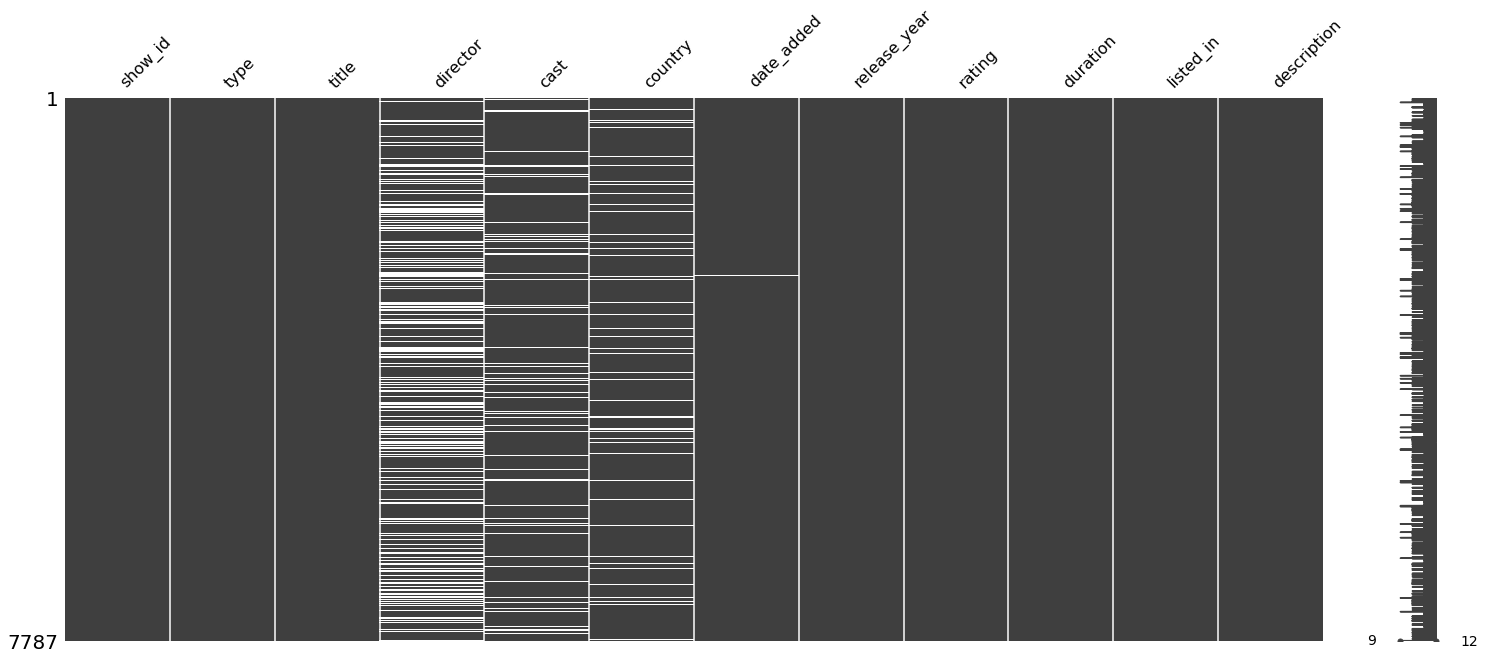

In [14]:
# visvalize missing values as a matrix
msno.matrix(df)

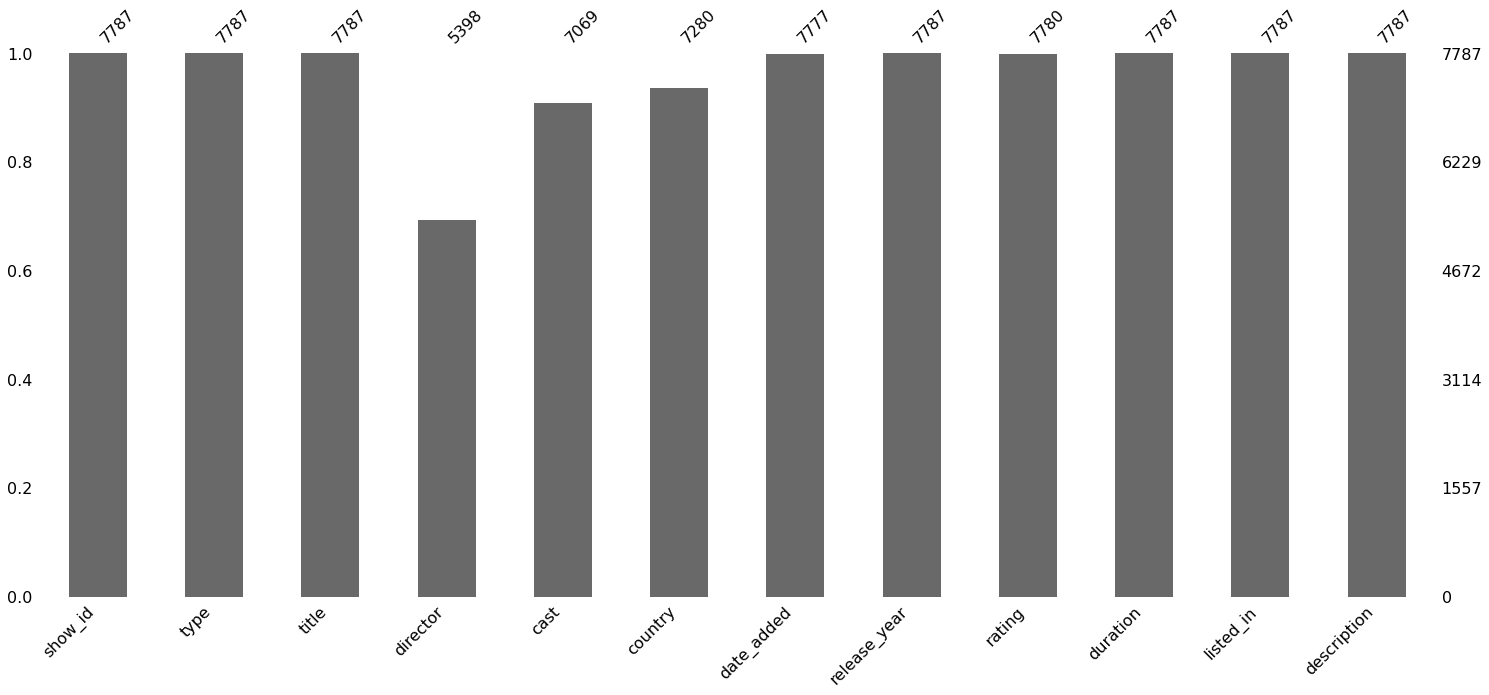

In [15]:
msno.bar(df)

In [16]:
# summing the values to get the null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [17]:
# checking the number of unique values
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [18]:
# Analyzing Statistics of the Dataset
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000




*   Netflix has 25% of movies and TV shows released in 2013 
*   About 75% of Netflix Content of movies and TV shows released after 2013

*   For more subscribers, Netflix should invest in classic Movies and TV shows.





In [40]:
#Change object variable to datetime
df["date_added"]=pd.to_datetime(df["date_added"])

#Extract year from the date and create a new variable
df["year_added"] = df["date_added"].dt.year

# Drop the 'date_added' Variable
df.drop('date_added',axis=1,inplace=True)
# find unique release year values and sort them
released_year = df['year_added'].unique()
released_year.sort()
print(f'As per our dataset , Netflix added all its contents in the span of {len(released_year)} years, from {released_year[1]} to {released_year[-1]}.')

As per our dataset , Netflix added all its contents in the span of 15 years, from 2009.0 to nan.


## **Creating Separate Datasets for Movies and TV Shows**

In [19]:
df_movies = df[df['type']=='Movie'].copy()
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [20]:
df_shows = df[df['type']=='TV Show'].copy()
df_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7775,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


# Discovering Information - EDA

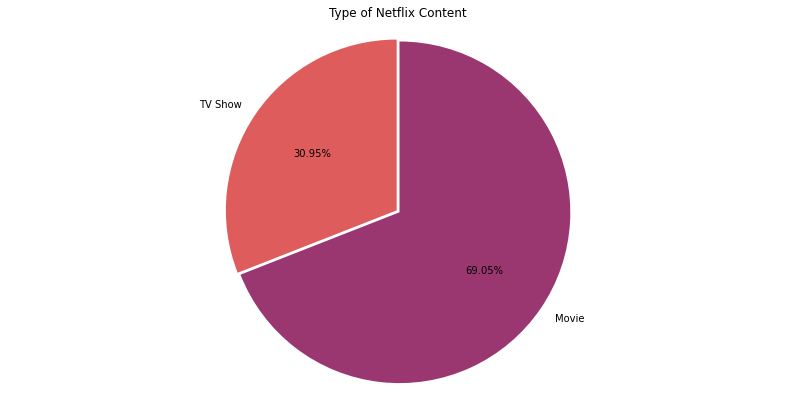

In [41]:
# Create a piechart
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%',colors=sns.color_palette("flare",2), startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

Clearly number of movies on Netflix outnumberd the number of TV Shows.
Alomst 70% content are movies while rest 30% are TV Shows. let us try some other visualization tool - countplot for other variables for the convinience we are creating a function



*   Listing all the unique for movies and TV Shows


*   Check for similarities/ difference between TV and movie rating 








In [42]:
# Creating a function to plot informative visuals of our data

def countplot_v(x,order,x_label,title):
  ''' Prints a verticle columns count plot which takes X-axis value, Order, X_label and title of plot'''
  # Let's check the total count of each class
  plt.figure(figsize=(10,6))
  plt.grid(b=False,axis='both')

  # Plotting the values in dependent variable
  ax=sns.countplot(x=x, data=df,order = order.value_counts().index[:10],
              palette="flare_r")

  #Anotate the bars with their values
  for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=15,color='#607B8B', 
                     xytext=(0, 8),
                     textcoords='offset points')

  # Removing all ticks and label
  plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

  # remove the frame of the chart
  for spine in plt.gca().spines.values():
      spine.set_visible(False)

  ax.set(xlabel=x_label, ylabel = "")
  plt.title(title)


  plt.show()

# **Contries** **Producing** **the** **most** **content**



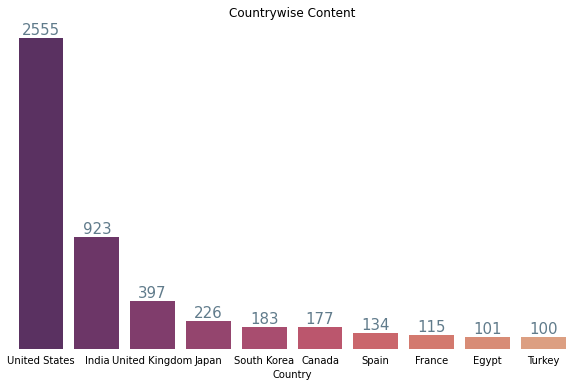

In [43]:
countplot_v("country",df['country'],"Country",'Countrywise Content')

The United States account for the majority of the content created on Netflix, numbering 2555 titles. India is the second largest with 923 titles

# **Number of Contents added by Year**

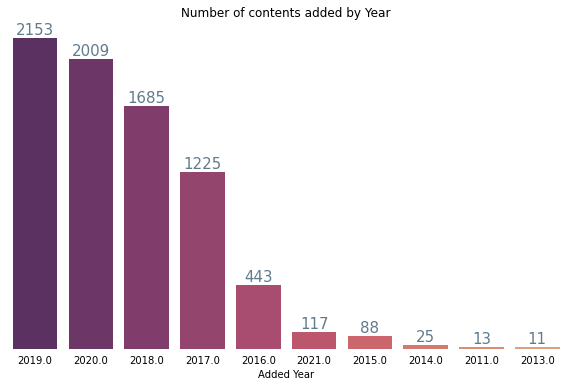

In [44]:
countplot_v("year_added",df['year_added'],"Added Year",'Number of contents added by Year')


clearly we can see the number of contents on the platform is incressing year on year. There is drastic increase in 2016-2017, this is probably Netflix was lanched in india this year. and to attract indian viwers it started adding indian contents as well

# Content relased by year 

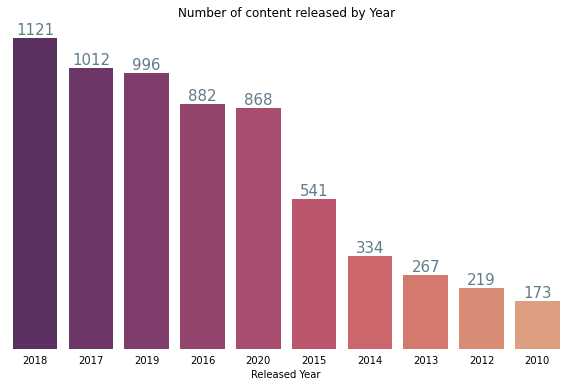

In [45]:
countplot_v("release_year",df['release_year'],"Released Year",'Number of content released by Year')

As per contents available on netflix most of them are from recent years i.e. from 2018,2017 and 2019. the trend shows that as we go from 2010 to 2018, the number of contents on the basis of respective year release 

# Top generes available

In [46]:
# Creating a function to plot insights in a horizontal manner

def countplot_h(y,order,x_label,y_label,title,annotate_len):
  ''' Prints a horizontal columns count plot which takes X-axis value, Order, X_label and title of plot'''

  plt.figure(figsize=(10,6))
  plt.grid(b=False,axis='both')

  ax=sns.countplot(y=y, data=df,order = order.value_counts().index[:10],
              palette="flare_r")

  # Annotate every single Bar with its value, based on it's width           
  for p in ax.patches:
      width = p.get_width()
      plt.text(annotate_len+p.get_x()+p.get_width(),p.get_y()+0.55*p.get_height(),
               '{:1.0f}'.format(width),
               ha='center', va='center')

  # Removing all ticks and label
  plt.tick_params(top=False, bottom=False, left=False, right=False, 
                  labelleft=True, labelbottom=False)


  # remove the frame of the chart
  for spine in plt.gca().spines.values():
      spine.set_visible(False)


  ax.set(xlabel=x_label, ylabel = y_label)
  plt.title(title)


  plt.show()


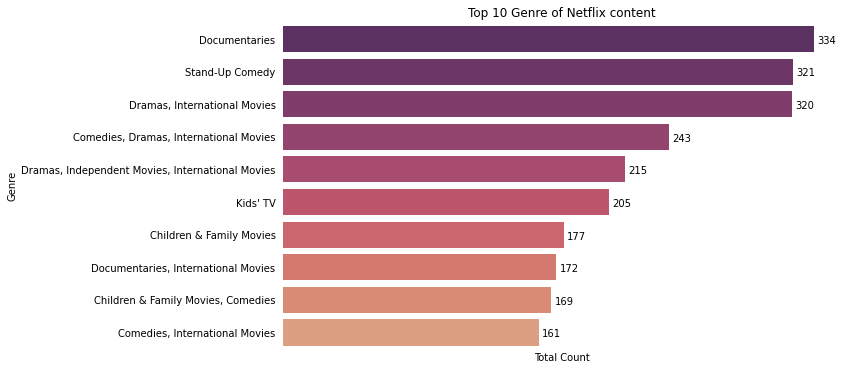

In [47]:
countplot_h("listed_in", df['listed_in'],"Total Count",'Genre','Top 10 Genre of Netflix content',8)

we can see that the dataset has various kinds of genres. The "Documentaries" is the top most genre in Netflix content. and then there are other like "stand-up compedy","Dramas",kides Tv",etc

# **Movies/Tv shows added by year **

In [48]:
# Create a list of years when content was added
years = list(range(2008,2020,1))
# Seperate Rows having only movies as content
movie_rows=df.loc[df["type"] == "Movie"]
# Seperate Rows having only TV Shows as content
tv_rows=df.loc[df["type"]=="TV Show"]

movies_counts = movie_rows.year_added.value_counts()
tv_counts = tv_rows.year_added.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

Text(0.5, 1.0, 'Movies/TV Shows Added per Year')

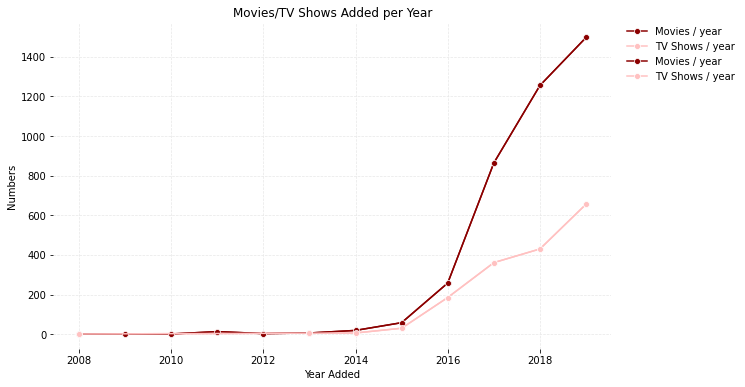

In [49]:
# Create a line plot
plt.figure(figsize=(10,6))

sns.lineplot(data=movies, color="#8B0000",  label="Movies / year",marker='o')
sns.lineplot(data=tv_shows, color="#FFC1C1",  label="TV Shows / year",marker='o')

# remove the frame
sns.lineplot(data=movies, color="#8B0000",  label="Movies / year",marker='o')
sns.lineplot(data=tv_shows, color="#FFC1C1",  label="TV Shows / year",marker='o')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)


plt.xlabel("Year Added")
plt.ylabel("Numbers")
plt.title('Movies/TV Shows Added per Year')

As can be seen in this plot, both TV showes and Movies content number increased drastically after 2016.
Aslo the number of movies added were much higher compared to TV Shows number 

# Ratings of content

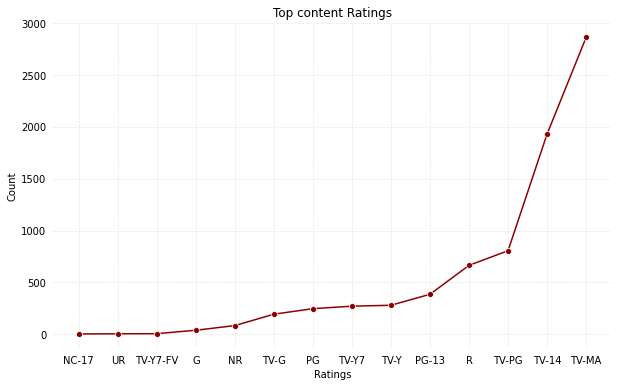

In [50]:
movie_ratings = df.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=True)

plt.figure(figsize=(10,6))

ax=sns.lineplot( x='rating',y='count',data=movie_ratings,color="#8B0000",marker='o')

# Annotate every single Bar with its value, based on it's width           
for p in ax.patches:
    width = p.get_width()
    plt.text(65+p.get_x()+p.get_width(),p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, 
                labelleft=True, labelbottom=True)


# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

ax.set(xlabel="Ratings", ylabel = "Count")
plt.title('Top content Ratings')


plt.show()

The plot shows with a rating of TV-MA are in the clear majority. This is followed by TV-14. These top two rating have way too much number of contents compared to other ratings

Movies/TV shows with respect to different **countries**

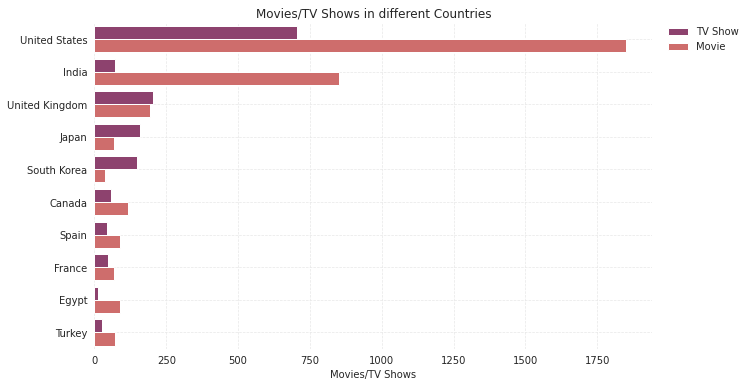

In [51]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Plotting the count plot
ax=sns.countplot(y='country',hue="type",data=df,
                 order = df['country'].value_counts().index[:10],
                 palette='flare_r')



# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, 
                labelleft=True, labelbottom=True)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Movies/TV Shows", ylabel = "")
plt.title("Movies/TV Shows in different Countries")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)


plt.show()

we have performed FDA on our data and drew some useful insights. our next objective is to make an unsupervised ML model which can doclustering of contents available on Netflix by matching text based features

# **Text pre-processing**

Text pre-processing is the process of preparing text data so that machines can use the same to perform tasks like analysis, predictions, etc. There are different steps in text pre-processing like - removing stopwords and punctuations , stemming of words etc. Let us start the preprocessing task.



a) **Removing Punctuations**:-
We need to carefully choose the list of punctuation which we are going to discard based on the use case.To remove punctuation let's create a function and apply them on our both variables

In [52]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split,KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [53]:
from nltk.parse import transitionparser
def remove_punctuation(text):
  ''' a function for removing punctuation'''
  import string
  # replacing the punctuations with no space
  # which in effect deletes the punctuation markes
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation markes 
  return text.translate(translator)


In [54]:
# Applying the function to remove punctuations
df['description'] = df['description'].apply(remove_punctuation)

# Applying the function to remove punctuations
df['listed_in'] = df['listed_in'].apply(remove_punctuation)